## 1) Dataset Description

### Player.csv
This dataset has 196 observations and 7 variables, described in Table 1.1, below. The average age of players is 21.14 and the average game play hours is 5.85 as supported in section 3) Exploratory Data Analysis.

Table 1.1:
| Variable | Type | Meaning | 
|---|---|---|
experience | chr | experience level of player |
subscribe | lgl| player is subscribed to newsletter or not | 
hashedEmail | chr | hashed player email |
played_hours | dbl | total hours played in game |
name | chr | player name |
gender | chr | player gender |
Age | int | player age |

Issues and Potential issues:

- It is unclear what the experience level of player is determined by. It appears that played_hours does not affect experience level.

How the data was collected:

The data was collected through a MineCraft server by a research group in Computer Science and UBC, led by Frank Wood during year 2024.


### Sessions.csv
This dataset has 1535 observations and 5 variables, described in Table 2.1 below.

Table 2.1:
| Variable | Type | Meaning |
|---|---|---|
hashedEmail | chr | hashed player email |
start_time |  chr | start date and time of session in game |
end_time | chr | end date and time of session in game |
original start time|  dbl | UNIX date and time of start_time |
original end time | dbl | UNIX date and time of end_time |

Issues and Potential issues:

- Issue with original_start_time and original_end_time: UNIX value is not shown fully in the original data set.
- Issue with start_time and end_time: the data is not tidy, meaning that the variable includes two values (date and time).

How the data was collected:

The data was collected through a MineCraft server by a research group in Computer Science and UBC, led by Frank Wood during year 2024.

## 2) Questions:

Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

 “Can [explanatory variable(s)] predict [response variable] in [dataset]?”

## 3) Exploratory Data Analysis and Visualization

Make a few exploratory visualizations of the data to help you understand it.
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)

Explain any insights you gain from these plots that are relevant to address your question
Note: do not perform any predictive analysis here. We are asking for an exploration of the relevant variables to demonstrate that you understand them well before performing any additional modelling, and to identify potential problems you anticipate encountering.

In [1]:
#install packages
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# load datasets
player_data <- read_csv("data/players.csv")
sessions_data <- read_csv("data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Observations
play_rows <- nrow(player_data)
print(play_rows)
sess_rows <- nrow(sessions_data)
print(sess_rows)

[1] 196
[1] 1535


In [4]:
# tidy sessions.csv
options(scipen = 999)

sessions_start <- separate(sessions_data, 
         col = start_time,
         into = c("start_date", "start_time"),
         sep = " "
         )
sessions_tidy <- separate(sessions_start, 
         col = end_time,
         into = c("end_date", "end_time"),
         sep = " "
         )
sessions_tidy

hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1719770000000,1719770000000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1718670000000,1718670000000
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1721930000000,1721930000000
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58,1721880000000,1721880000000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12,1716650000000,1716650000000
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,23/06/2024,17:10,1719160000000,1719160000000
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024,07:12,15/04/2024,07:21,1713170000000,1713170000000
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024,02:13,21/09/2024,02:30,1726880000000,1726890000000
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024,02:31,21/06/2024,02:49,1718940000000,1718940000000


In [5]:
# summarize players.csv

player_summary <- summarize(player_data,
                            Avg_play_hours = mean(played_hours, na.rm = TRUE),
                            Avg_age = mean(Age, na.rm = TRUE)
                            )
player_summary

Avg_play_hours,Avg_age
<dbl>,<dbl>
5.845918,21.13918


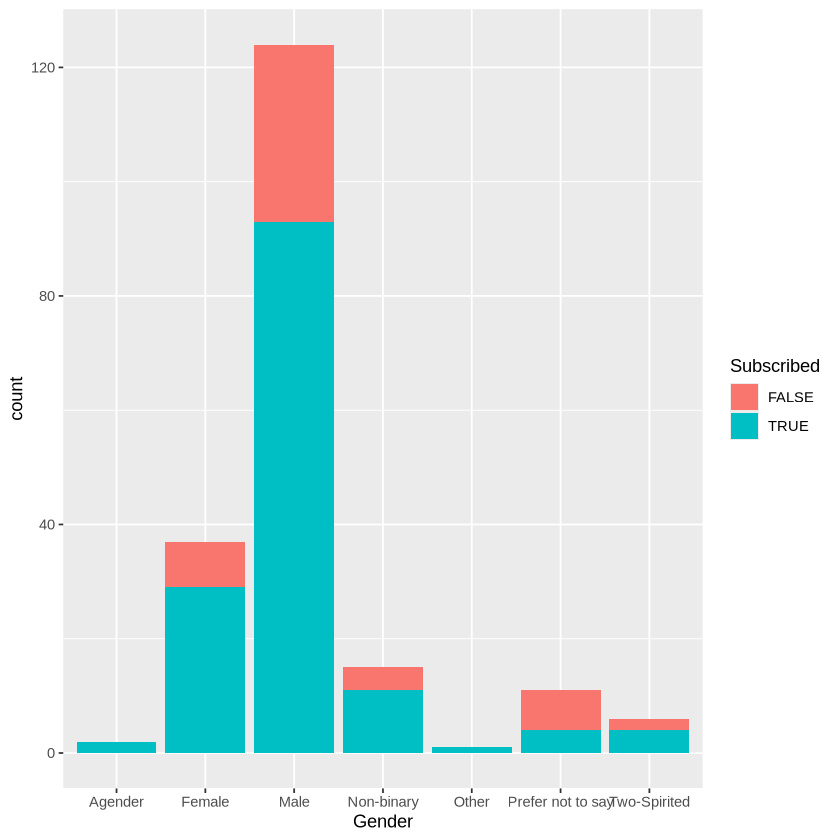

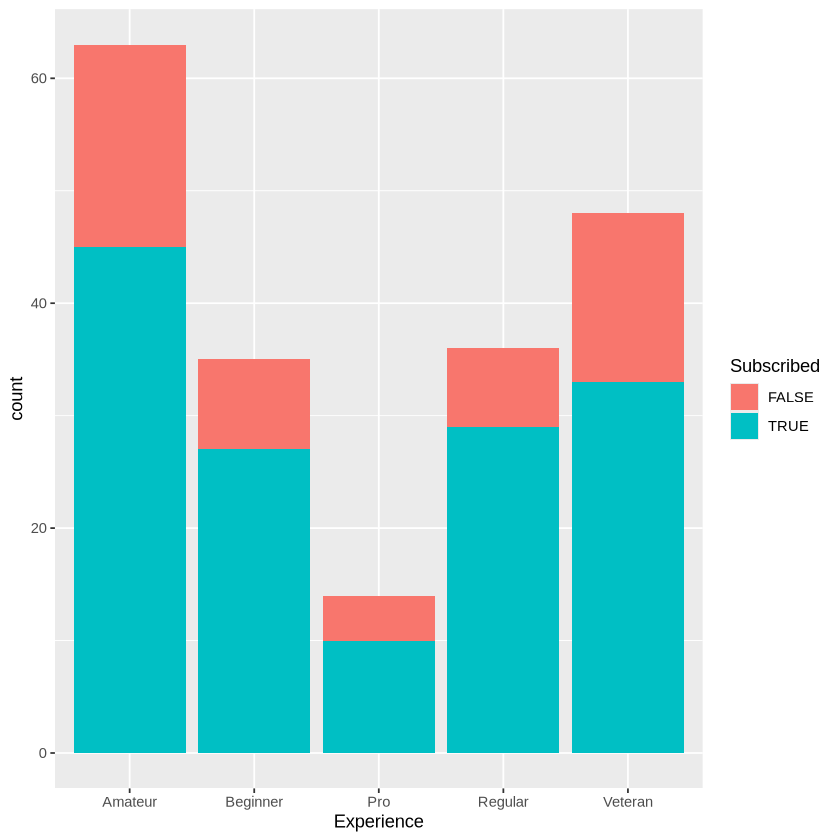

In [15]:
# visualizations

player_gender <- ggplot(player_data, aes(x=as.factor(gender), fill=as.factor(subscribe))) +
            geom_bar() +
            labs(x="Gender", fill= "Subscribed")

player_gender

player_experience <- ggplot(player_data, aes(x=as.factor(experience), fill=as.factor(subscribe))) +
            geom_bar() +
            labs(x="Experience", fill= "Subscribed")

player_experience

## 4) Methods and Plan
Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Do not perform any modelling or present results at this stage. We are looking for high-level planning regarding model choice and justifying that choice.

In your explanation, respond to the following questions:

Why is this method appropriate?
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
How are you going to compare and select the model?
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?

## 5) GitHub Repository
https://github.com/ericayagi/toy_ds_project